# FSA on human faces in 1D

### As usual, load in face data and scale things

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
#load data

fea = pd.read_csv('faces_fea.csv',header=None)

# Data is saved in a dataframe 'fea' where rows are images (n=2414) and columns are pixels (m=32*32=1024)
# To plot the images as 2-D you first need to reshape each column (1-D) into a 2-D matrix
# This is done for you below in the examples that plot the images 

In [3]:
#open up data to see what we're working with -- note that pixel values range from 0 to 255

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,82,81,72,72,40,93,119,129,135,121,...,91,89,92,75,80,67,57,35,33,22
1,86,86,74,67,47,66,87,101,118,132,...,89,82,87,69,60,57,41,20,14,9
2,76,88,80,62,60,20,22,40,75,137,...,80,73,70,52,37,37,16,9,6,6
3,15,16,22,11,23,8,7,7,6,4,...,14,12,9,11,9,10,7,7,5,5
4,70,69,48,64,46,109,138,147,136,102,...,94,88,83,65,74,78,66,45,39,34


In [4]:
#normalize data to range from 0 to 1; recheck what it looks like

fea/=fea.max().max()

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.321569,0.317647,0.282353,0.282353,0.156863,0.364706,0.466667,0.505882,0.529412,0.474510,...,0.356863,0.349020,0.360784,0.294118,0.313725,0.262745,0.223529,0.137255,0.129412,0.086275
1,0.337255,0.337255,0.290196,0.262745,0.184314,0.258824,0.341176,0.396078,0.462745,0.517647,...,0.349020,0.321569,0.341176,0.270588,0.235294,0.223529,0.160784,0.078431,0.054902,0.035294
2,0.298039,0.345098,0.313725,0.243137,0.235294,0.078431,0.086275,0.156863,0.294118,0.537255,...,0.313725,0.286275,0.274510,0.203922,0.145098,0.145098,0.062745,0.035294,0.023529,0.023529
3,0.058824,0.062745,0.086275,0.043137,0.090196,0.031373,0.027451,0.027451,0.023529,0.015686,...,0.054902,0.047059,0.035294,0.043137,0.035294,0.039216,0.027451,0.027451,0.019608,0.019608
4,0.274510,0.270588,0.188235,0.250980,0.180392,0.427451,0.541176,0.576471,0.533333,0.400000,...,0.368627,0.345098,0.325490,0.254902,0.290196,0.305882,0.258824,0.176471,0.152941,0.133333


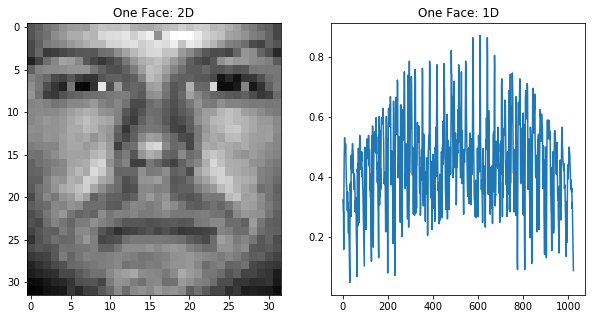

In [5]:
#plot a face

faceW = 32 #number of pixels in image width
faceH = 32 #number of pixels i|n image height
one_face = np.reshape(np.asarray(fea.iloc[0,:]),(faceH,faceW)).T

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(one_face,cmap='gray',aspect='auto')
plt.title('One Face: 2D')

plt.subplot(122)
plt.plot(fea.iloc[0,:])
plt.title('One Face: 1D')

plt.show()

In [6]:
# we will filter one face with a tapering function; first, define taper

x = np.asarray(fea.iloc[0,:])
N = len(x) #number of pixels in face
L = N #length of face vector
dx = 1 #spatial sampling

taper_function = np.ones_like(x)
taper_length = 20
taper_function[:taper_length] = np.square(np.sin(np.pi*np.arange(taper_length)/(2*taper_length)))
taper_function[-taper_length:] = np.square(np.sin(np.pi*np.arange(taper_length,0,-1)/(2*taper_length)))

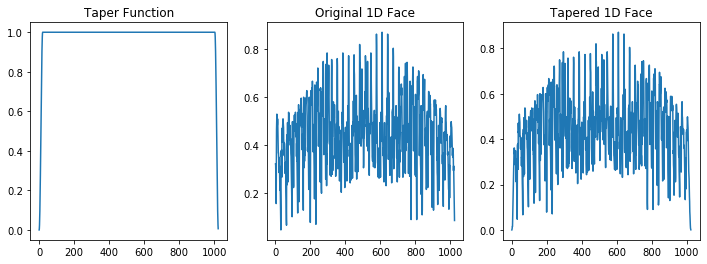

In [7]:
#visualize taper function, and taper-ed 1D face

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(taper_function)
plt.title('Taper Function')

plt.subplot(132)
plt.plot(x)
plt.title('Original 1D Face')

plt.subplot(133)
plt.plot(x*taper_function)
plt.title('Tapered 1D Face')

plt.show()

In [8]:
# do fft of tapered face
x_taper = x*taper_function
xfft_taper = np.fft.fft(x_taper)
power = abs(np.square(xfft_taper))
power[0] = 0 #remove power from mean signal

k = np.arange(0,N)*2*np.pi/L #wavenumber

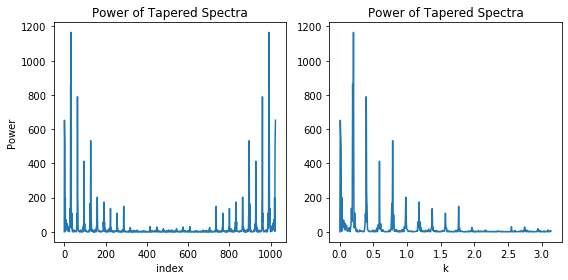

In [9]:
#visualize power spectra

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(power)
plt.xlabel('index')
plt.ylabel('Power')
plt.title('Power of Tapered Spectra')

#plot just positive frequencies
plt.subplot(122)
inds = range(int(N/2)+1)
plt.plot(k[inds],power[inds])
plt.xlabel('k')
plt.title('Power of Tapered Spectra')

plt.tight_layout()

plt.show()

In [10]:
# apply low pass filter: k<1

index = 170 #manually identified as threshold for k=1; feel free to play with this and see what happens
xfft_filter = np.zeros(np.size(xfft_taper),dtype='complex')
xfft_filter[:index] = xfft_taper[:index]
xfft_filter[-index:] = xfft_taper[-index:]

power_lowpass = abs(np.square(xfft_filter))
power_lowpass[0] = 0

# now inverse fft to get back the filtered x

x_filter = np.fft.ifft(xfft_filter)

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


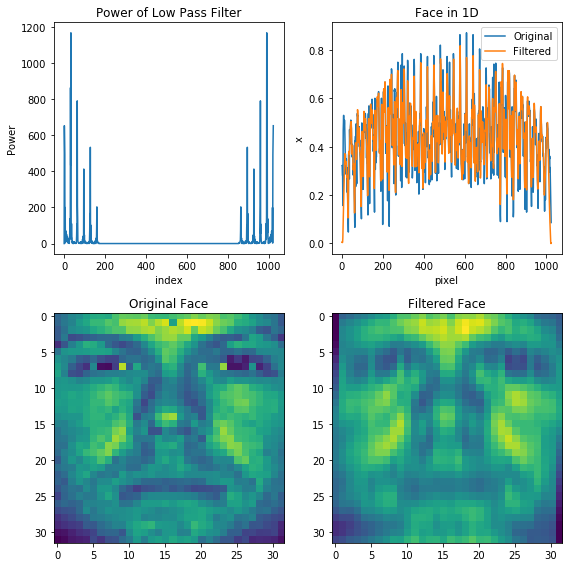

In [11]:
#visualize filtered power spectra

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.plot(power_lowpass)
plt.xlabel('index')
plt.ylabel('Power')
plt.title('Power of Low Pass Filter')

plt.subplot(222)
plt.plot(x)
plt.plot(x_filter)
plt.xlabel('pixel')
plt.ylabel('x')
plt.legend(('Original','Filtered'))
plt.title('Face in 1D')

face = np.reshape(x,(faceH,faceW)).T
plt.subplot(223)
plt.imshow(face)
plt.title('Original Face')

face_filter = np.reshape(np.real(x_filter),(faceH,faceW)).T #there are residual imaginary artifacts (very smal) leftover in the x_filter; remove for plotting 
plt.subplot(224)
plt.imshow(face_filter)
plt.title('Filtered Face')

plt.tight_layout()

plt.show()

#note that the low-frequency image is blurry -- does not capture high-frequency variations in the image!

In [12]:
#now, apply a high-pass filter (k>1)

index = 170 #manually identified as threshold for k=1; feel free to play with this and see what happens
xfft_filter = np.copy(xfft_taper)
xfft_filter[:index] = np.zeros_like(xfft_filter[:index])
xfft_filter[-index:] = np.zeros_like(xfft_filter[-index:])
xfft_filter[0] = xfft_taper[0]

power_highpass = abs(np.square(xfft_filter))
power_highpass[0] = 0

# now inverse fft to get back the filtered x

x_filter = np.fft.ifft(xfft_filter)

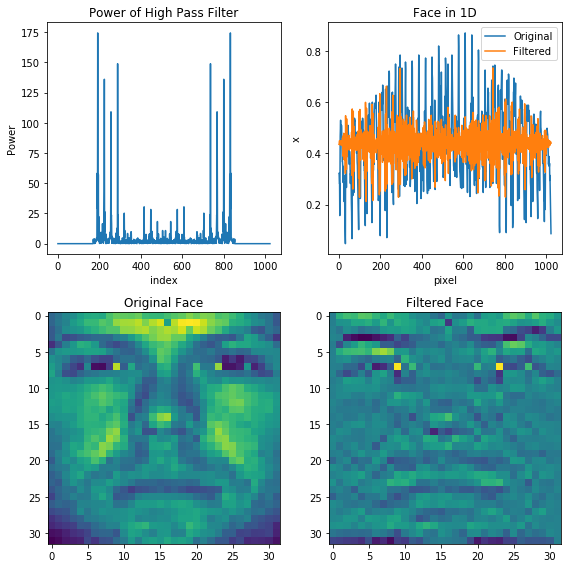

In [13]:
#visualize filtered power spectra

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.plot(power_highpass)
plt.xlabel('index')
plt.ylabel('Power')
plt.title('Power of High Pass Filter')

plt.subplot(222)
plt.plot(x)
plt.plot(x_filter)
plt.xlabel('pixel')
plt.ylabel('x')
plt.legend(('Original','Filtered'))
plt.title('Face in 1D')

face = np.reshape(x,(faceH,faceW)).T
plt.subplot(223)
plt.imshow(face)
plt.title('Original Face')

face_filter = np.reshape(np.real(x_filter),(faceH,faceW)).T #there are residual imaginary artifacts (very smal) leftover in the x_filter; remove for plotting 
plt.subplot(224)
plt.imshow(face_filter)
plt.title('Filtered Face')

plt.tight_layout()

plt.show()

#note that the high-frequency image is weird -- only captures high-frequency variations in the image!

### Q1: apply a filter that keeps only the signals associated with the lowest wavelengths (k small).

In [14]:
# apply very low pass filter

index = 20 #manually identified as threshold for k=1; feel free to play with this and see what happens
xfft_filter = np.zeros(np.size(xfft_taper),dtype='complex')
xfft_filter[:index] = xfft_taper[:index]
xfft_filter[-index:] = xfft_taper[-index:]

power_lowpass = abs(np.square(xfft_filter))
power_lowpass[0] = 0

# now inverse fft to get back the filtered x

x_filter = np.fft.ifft(xfft_filter)

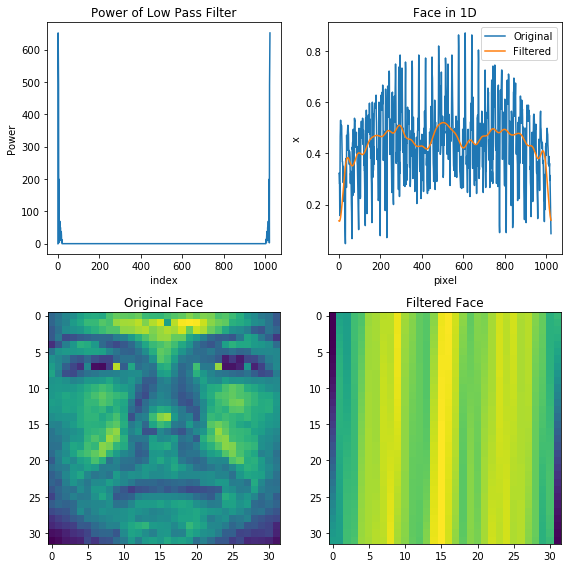

In [15]:
#visualize filtered power spectra

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.plot(power_lowpass)
plt.xlabel('index')
plt.ylabel('Power')
plt.title('Power of Low Pass Filter')

plt.subplot(222)
plt.plot(x)
plt.plot(x_filter)
plt.xlabel('pixel')
plt.ylabel('x')
plt.legend(('Original','Filtered'))
plt.title('Face in 1D')

face = np.reshape(x,(faceH,faceW)).T
plt.subplot(223)
plt.imshow(face)
plt.title('Original Face')

face_filter = np.reshape(np.real(x_filter),(faceH,faceW)).T #there are residual imaginary artifacts (very smal) leftover in the x_filter; remove for plotting 
plt.subplot(224)
plt.imshow(face_filter)
plt.title('Filtered Face')

plt.tight_layout()

plt.show()

#note that the low-frequency image doesn't even look like a face anymore!